# オープンデータの活用(1)：気象庁データを用いたデータ可視化
気象庁のデータの可視化，具体的には折れ線グラフ化を試みる

### 気象庁の提供するデータの形式 (CSV)：
```
ダウンロードした時刻：2020/05/30 14:07:33

,京都,京都,京都,京都,京都,京都,京都,京都,京都
年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)
,,,,,,,,,
,,品質情報,均質番号,,品質情報,均質番号,,品質情報,均質番号
2016/1/1,5.7,8,1,10.6,8,1,2.1,8,1
2016/1/2,6.7,8,1,12.9,8,1,1.8,8,1
2016/1/3,9.3,8,1,15.8,8,1,4.7,8,1
2016/1/4,10.2,8,1,16.0,8,1,5.3,8,1
```



## Google Drive のマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## CSV モジュールを用いたデータ読み込み／matplotlib モジュール用いた可視化

## データ形式を再掲（説明用）
## 2016/1/1,5.7,8,1,10.6,8,1,2.1,8,1

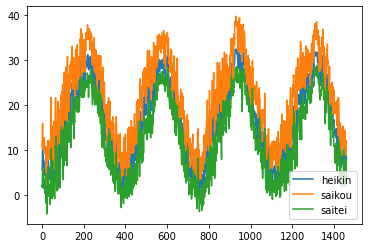

In [ ]:
import csv
import matplotlib.pyplot as plt

'''
気象庁のデータを用いた可視化
'''
f = open("/content/drive/My Drive/BASE/OpenData/kyoto.csv", "r", encoding="shiftjis")
reader = csv.reader(f)

# ヘッダ部を読み飛ばす
for i in range(6):
	next(reader)

# データ格納用のリストを準備
date = [] # 日付
heikin = [] #平均気温
saikou = [] #最高気温
saitei = [] # 最低気温

# CSV ファイルからデータ読み込み
for row in reader:
	date.append(row[0])
	heikin.append(float(row[1]))
	saikou.append(float(row[4]))
	saitei.append(float(row[7]))

f.close()

# 平均気温，最高気温，最低気温
plt.plot(heikin, label="heikin")
plt.plot(saikou, label="saikou")
plt.plot(saitei, label="saitei")
plt.legend() # 凡例の表示
plt.show()


## 課題
気象庁のサイトから「複数の地点の気温データ」を同時に得ることができる。
以下の指定によってデータを取得し，各地の気温の推移をプロットせよ。
- 地点：宇部市，那覇市，札幌市
- 項目：データの種類は「日別値」，項目は「日平均気温」
- 期間：2019年1月1日〜2020年12月31日

完成イメージは以下のとおり：


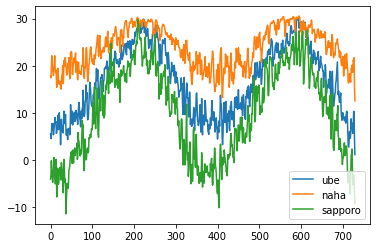